In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfTrain = pd.read_csv("train.csv")

In [3]:
dfTest = pd.read_csv("test.csv")

In [4]:
features = list(dfTest.columns)+["IN_TREINEIRO"]
dfTrain = dfTrain[features]


In [5]:
#Criando um dataframe auxliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'colunas' : dfTrain.columns,
                    'tipo': dfTrain.dtypes,
                    'missing' : dfTrain.isna().sum(),
                    'size' : dfTrain.shape[0],
                  'unicos': dfTrain.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)
cons.sort_values(by=['percentual'],ascending=False,
    inplace=True)
cons.head(10)

,colunas,tipo,missing,size,unicos,percentual
TP_DEPENDENCIA_ADM_ESC,TP_DEPENDENCIA_ADM_ESC,float64,9448,13730,4,0.69
TP_ENSINO,TP_ENSINO,float64,9448,13730,3,0.69
Q027,Q027,object,7373,13730,13,0.54
NU_NOTA_REDACAO,NU_NOTA_REDACAO,float64,3597,13730,53,0.26
NU_NOTA_LC,NU_NOTA_LC,float64,3597,13730,2774,0.26
TP_STATUS_REDACAO,TP_STATUS_REDACAO,float64,3597,13730,9,0.26
NU_NOTA_COMP1,NU_NOTA_COMP1,float64,3597,13730,15,0.26
NU_NOTA_COMP2,NU_NOTA_COMP2,float64,3597,13730,13,0.26
NU_NOTA_COMP3,NU_NOTA_COMP3,float64,3597,13730,12,0.26
NU_NOTA_COMP4,NU_NOTA_COMP4,float64,3597,13730,14,0.26


In [6]:
numericas = sorted(list(cons[cons['tipo'] != 'object']['colunas']))

In [7]:
categoricas_modelo = list(cons[(cons['tipo'] == 'object') & (cons['missing'] == 0)]['colunas'])

In [8]:
remove = ['CO_PROVA_CH','CO_PROVA_CN','CO_PROVA_LC','CO_PROVA_MT','NU_INSCRICAO']
for i,j in enumerate(categoricas_modelo):
    if (j in remove):
        categoricas_modelo.pop(i)


In [9]:
len(numericas)

33

In [10]:
len(categoricas_modelo)

9

In [11]:
dfTrain[categoricas_modelo].iloc[[0]]


,Q001,Q002,Q006,Q024,Q025,Q026,Q047,SG_UF_RESIDENCIA,TP_SEXO
0,D,D,C,A,A,C,A,RS,M


In [12]:
for i in numericas:
    dfTrain[i] = dfTrain[i].fillna(dfTrain[i].mean())

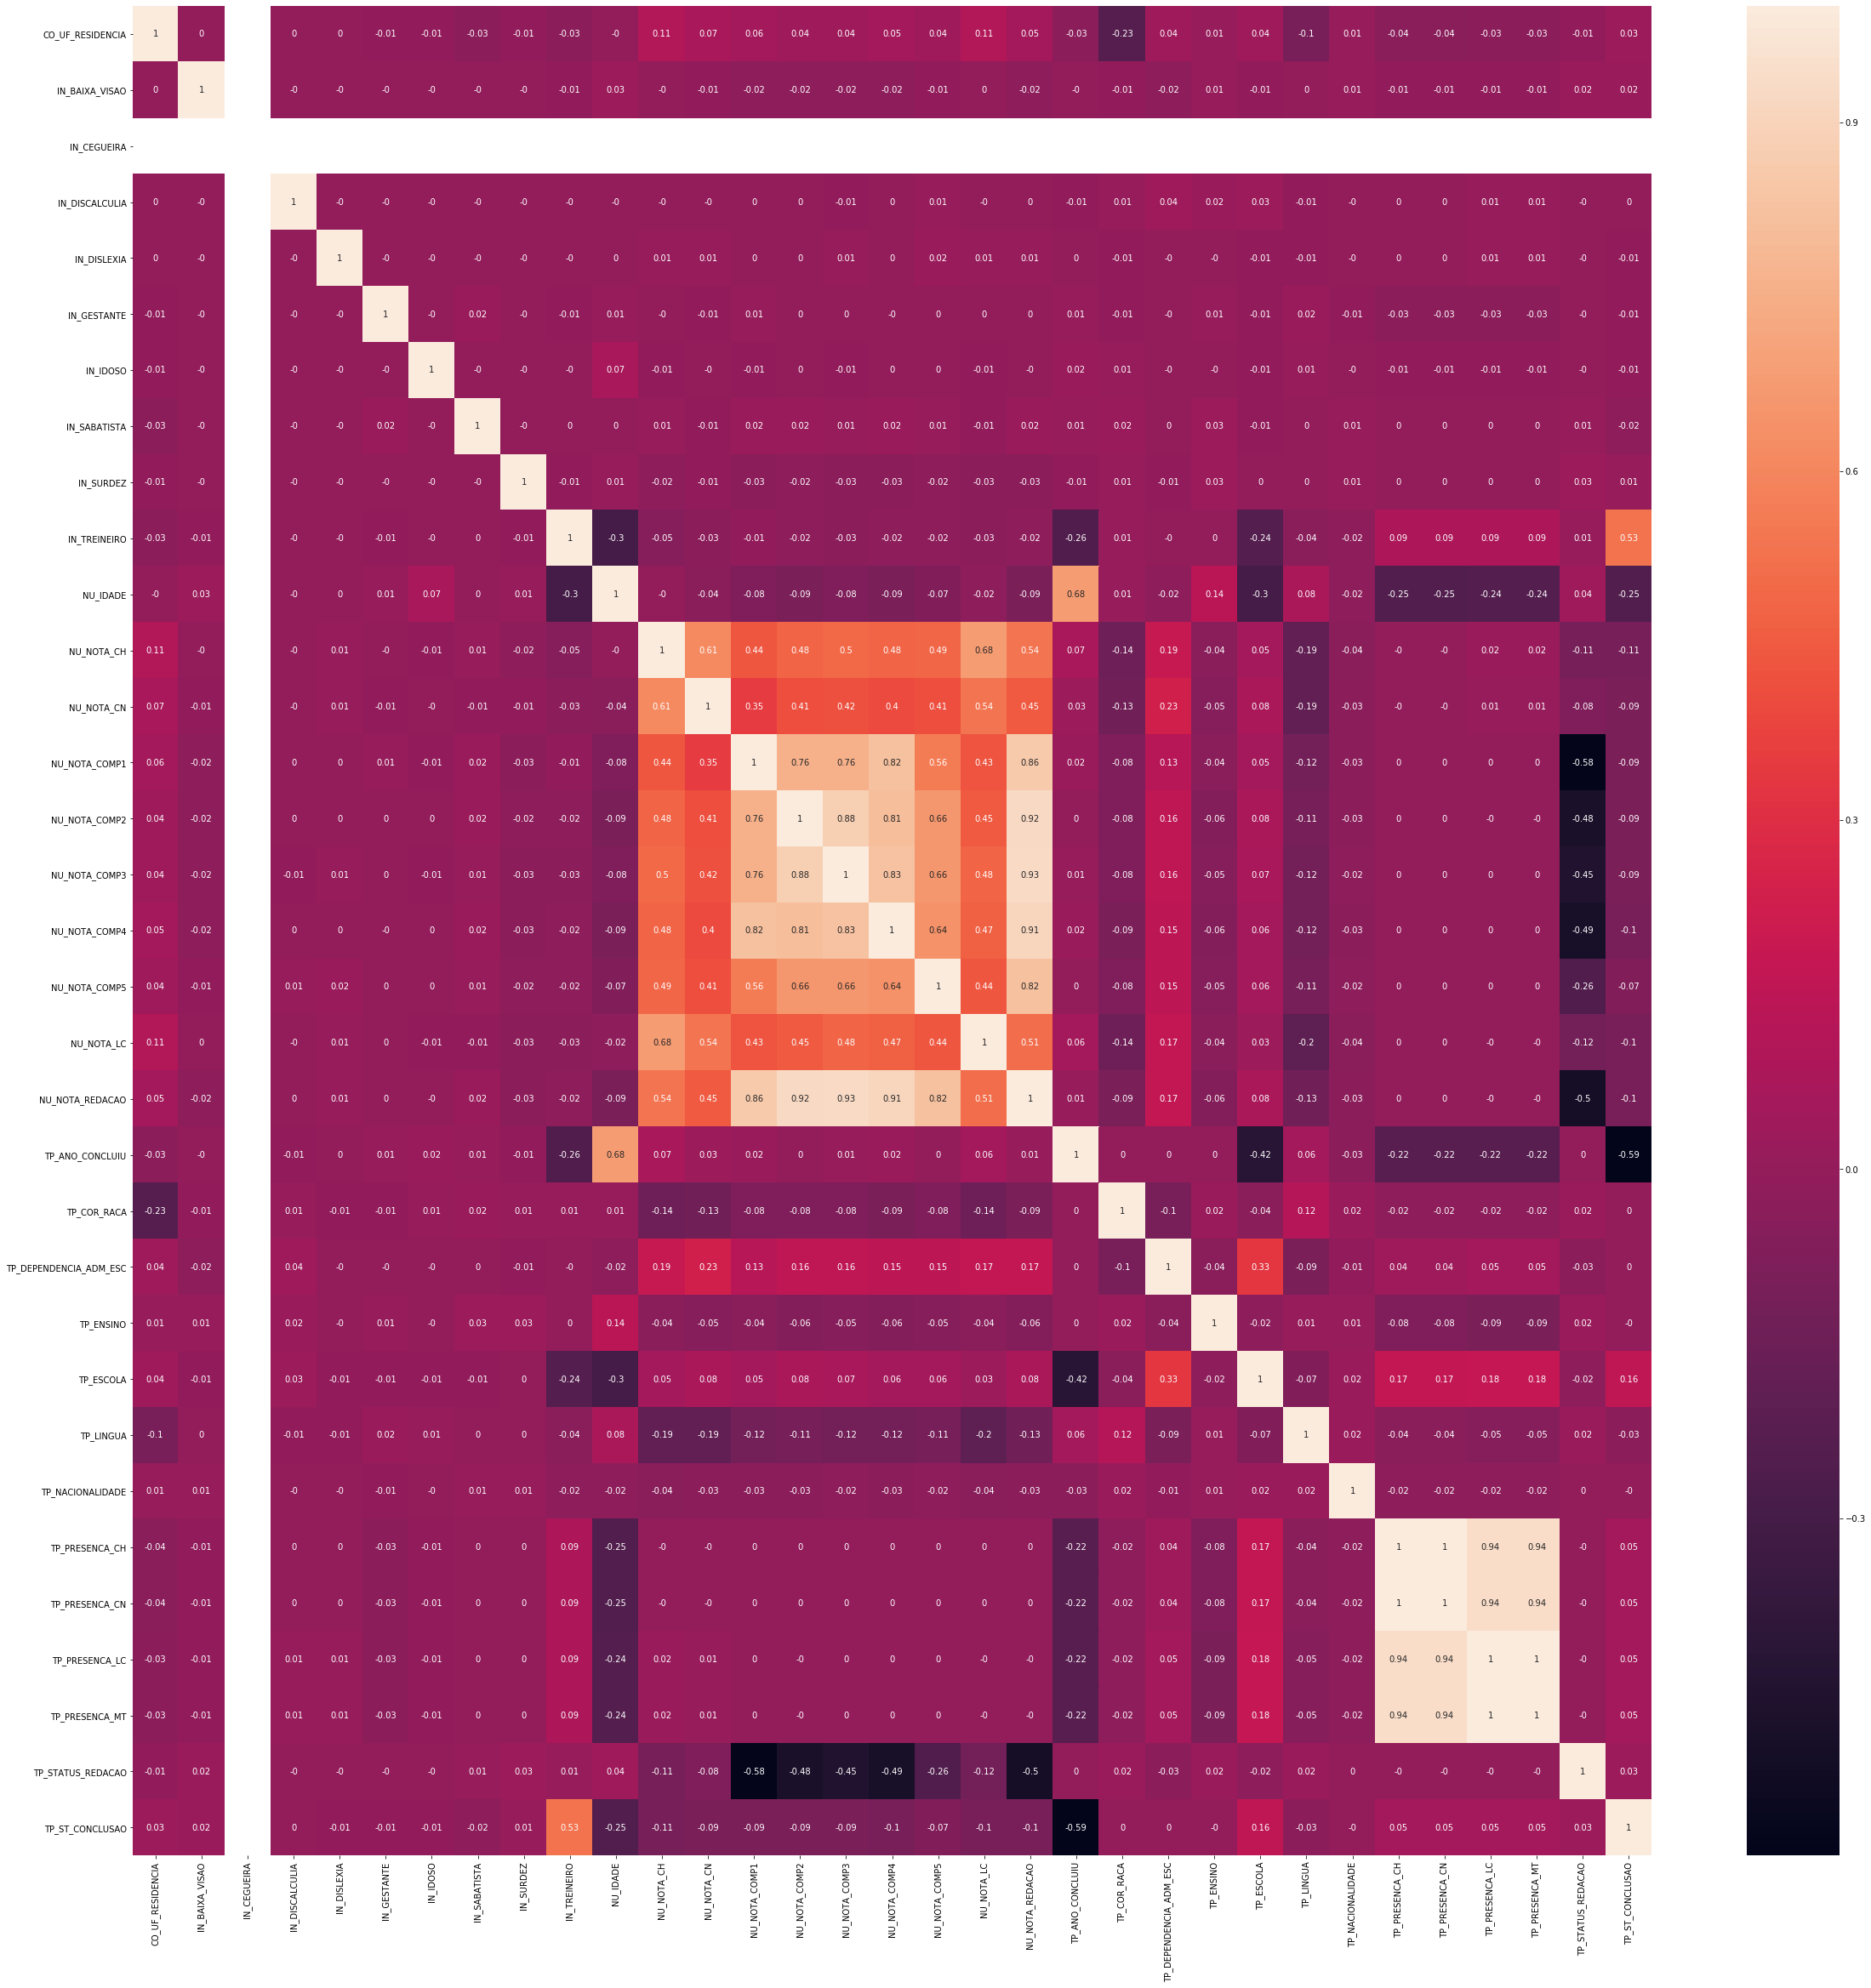

In [13]:
#Analisando a correlacao entre as variaveis númericas
plt.figure(figsize = (40,40))
sns.heatmap(dfTrain[numericas].corr().round(2), annot= True)

In [14]:
for i,j in enumerate(numericas):
    if (j == 'IN_TREINEIRO'):
        numericas.pop(i)
    

In [15]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(dfTrain[numericas+categoricas_modelo])
y = dfTrain['IN_TREINEIRO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print("Quantidade Observações:\nTreino:" ,X_train.shape[0], "\n Teste:", X_test.shape[0])

Quantidade Observações:
Treino: 10984 
 Teste: 2746


In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [17]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

In [18]:
featureImportance = pd.DataFrame({'coluna':X_train.columns,
              'bool': sel.get_support(),
              'importance': pd.Series(sel.estimator_.feature_importances_)})

In [19]:
featureImportance = featureImportance.sort_values(by='importance', ascending=False)
featureImportance.head(5)

,coluna,bool,importance
9,NU_IDADE,True,0.330683
31,TP_ST_CONCLUSAO,True,0.261513
19,TP_ANO_CONCLUIU,True,0.062429
22,TP_ENSINO,True,0.048470
23,TP_ESCOLA,True,0.047062


In [20]:
list(featureImportance[featureImportance['bool'] == True]['coluna'])#o primeiro elemento e o target

['NU_IDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ENSINO',
 'TP_ESCOLA',
 'Q026_A',
 'TP_DEPENDENCIA_ADM_ESC',
 'Q026_B',
 'SG_UF_RESIDENCIA_CE',
 'CO_UF_RESIDENCIA',
 'NU_NOTA_LC',
 'NU_NOTA_CH']

In [21]:
importantes = list(featureImportance[featureImportance['bool'] == True]['coluna']) #o primeiro elemento e o target

In [22]:
importantes = ['NU_IDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'Q026_A',
 'Q026_B',
 'SG_UF_RESIDENCIA_CE',
 'Q026_C']

In [23]:
from sklearn.model_selection import train_test_split
X = pd.get_dummies(dfTrain[numericas+categoricas_modelo])[importantes]
y = dfTrain['IN_TREINEIRO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)
print("Quantidade Observações:\nTreino:" ,X_train.shape[0], "\n Teste:", X_test.shape[0])

Quantidade Observações:
Treino: 10984 
 Teste: 2746


In [24]:
from tpot import TPOTClassifier

/home/arthur/codenation/enem-4/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/arthur/codenation/enem-4/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
tp = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [26]:
tp.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.9968135883258592
Generation 2 - Current best internal CV score: 0.9968135883258592


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=11, min_samples_split=3, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [27]:
rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=0.9500000000000001, min_samples_leaf=11, min_samples_split=3, n_estimators=100)

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None,
                       max_features=0.9500000000000001, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=11,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [29]:
y_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2395
           1       1.00      0.98      0.99       351

    accuracy                           1.00      2746
   macro avg       1.00      0.99      1.00      2746
weighted avg       1.00      1.00      1.00      2746



In [32]:
numericas

['CO_UF_RESIDENCIA',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_DISCALCULIA',
 'IN_DISLEXIA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'IN_SABATISTA',
 'IN_SURDEZ',
 'NU_IDADE',
 'NU_NOTA_CH',
 'NU_NOTA_CN',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'TP_ANO_CONCLUIU',
 'TP_COR_RACA',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_ENSINO',
 'TP_ESCOLA',
 'TP_LINGUA',
 'TP_NACIONALIDADE',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'TP_STATUS_REDACAO',
 'TP_ST_CONCLUSAO']

In [33]:
dfTestX = pd.get_dummies(dfTest[numericas+categoricas_modelo])[importantes]

In [34]:
#Criando um dataframe auxliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'colunas' : dfTestX.columns,
                    'tipo': dfTestX.dtypes,
                    'missing' : dfTestX.isna().sum(),
                    'size' : dfTestX.shape[0],
                  'unicos': dfTestX.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)
cons.sort_values(by=['percentual'],ascending=False,
    inplace=True)
cons.head(100)

,colunas,tipo,missing,size,unicos,percentual
NU_IDADE,NU_IDADE,int64,0,4570,47,0.0
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,int64,0,4570,4,0.0
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,int64,0,4570,11,0.0
TP_ESCOLA,TP_ESCOLA,int64,0,4570,4,0.0
Q026_A,Q026_A,uint8,0,4570,2,0.0
Q026_B,Q026_B,uint8,0,4570,2,0.0
SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_CE,uint8,0,4570,2,0.0
Q026_C,Q026_C,uint8,0,4570,2,0.0


In [35]:
list(cons[cons['percentual']== 0.00]['colunas'])

['NU_IDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'Q026_A',
 'Q026_B',
 'SG_UF_RESIDENCIA_CE',
 'Q026_C']

In [36]:
y_pred = rf.predict(dfTestX)

In [41]:
df_output = pd.DataFrame()
df_output['NU_INSCRICAO'] = dfTest['NU_INSCRICAO']
df_output['IN_TREINEIRO'] = y_pred
df_output.head()

,NU_INSCRICAO,IN_TREINEIRO
0,ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
1,177f281c68fa032aedbd842a745da68490926cd2,0
2,6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
3,5c356d810fa57671402502cd0933e5601a2ebf1e,0
4,df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0


In [42]:
dictResposta = {'NU_INSCRICAO': list(dfTest['NU_INSCRICAO']),
               'IN_TREINEIRO': list(y_pred)}

In [43]:
df_output = pd.DataFrame.from_dict(dictResposta)
df_output.to_csv('answer.csv', index=False)
